In [1]:
!pip install tsai sktime yfinance tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.1/313.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.2/118.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 89.1 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
INFO: pip is looking at multiple versions of distributed to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 995.5/995.5 kB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.9/99

In [2]:
from tsai.all import *
import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Exploratory Data Analysis

In [3]:
data = yf.download("NVDA")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376288,271468800
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415709,51048000
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383456,34320000
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382261,24436800
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381067,22752000
...,...,...,...,...,...,...
2023-10-16,450.630005,462.250000,449.119995,460.950012,460.950012,37509900
2023-10-17,440.000000,447.540009,424.799988,439.380005,439.380005,81233300
2023-10-18,425.910004,432.190002,418.250000,421.959991,421.959991,62729400


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6.228000e+03
mean,38.926146,39.653094,38.175124,38.941895,38.680517,6.110934e+07
std,80.631718,82.122744,79.051604,80.627207,80.642552,4.372755e+07
min,0.348958,0.355469,0.333333,0.341146,0.312976,1.968000e+06
25%,2.705000,2.796875,2.631875,2.710703,2.486869,3.454890e+07
50%,4.427500,4.500000,4.342500,4.423750,4.088280,5.126605e+07
75%,36.780000,37.653124,36.201251,36.866875,36.575157,7.429110e+07
max,502.160004,502.660004,489.579987,493.549988,493.509338,9.230856e+08


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6228 entries, 1999-01-22 to 2023-10-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6228 non-null   float64
 1   High       6228 non-null   float64
 2   Low        6228 non-null   float64
 3   Close      6228 non-null   float64
 4   Adj Close  6228 non-null   float64
 5   Volume     6228 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 340.6 KB


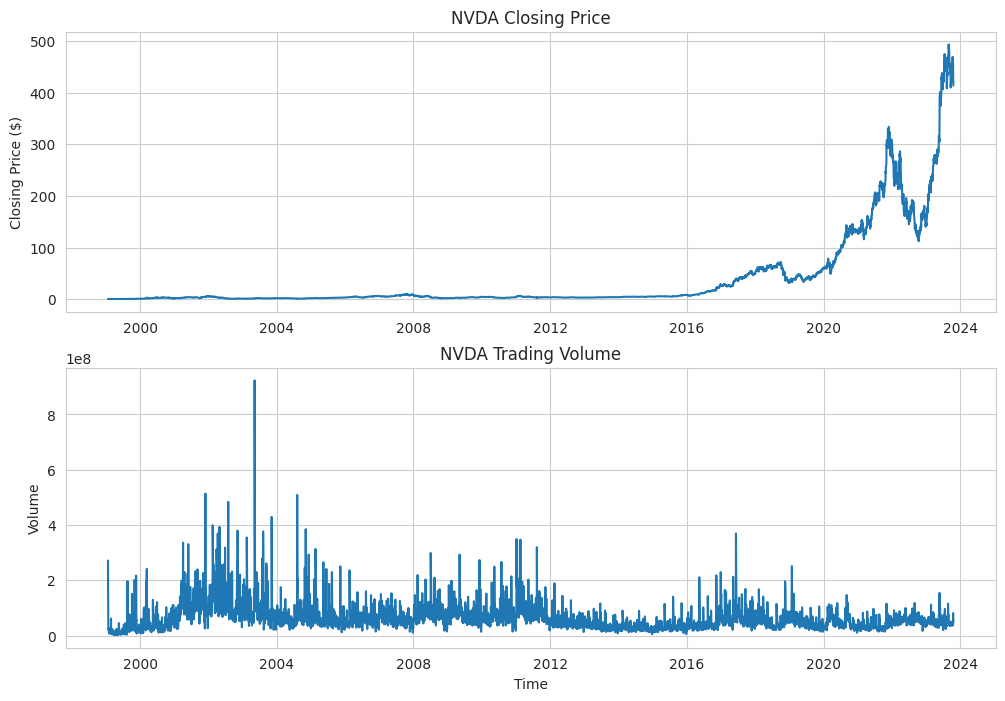

In [6]:
# Plot the closing price and sales volumes over time

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(data['Close'])
plt.title('NVDA Closing Price')
plt.ylabel('Closing Price ($)')

plt.subplot(2, 1, 2)
plt.plot(data['Volume'])
plt.title('NVDA Trading Volume')
plt.ylabel('Volume')

plt.xlabel('Time')
plt.show()

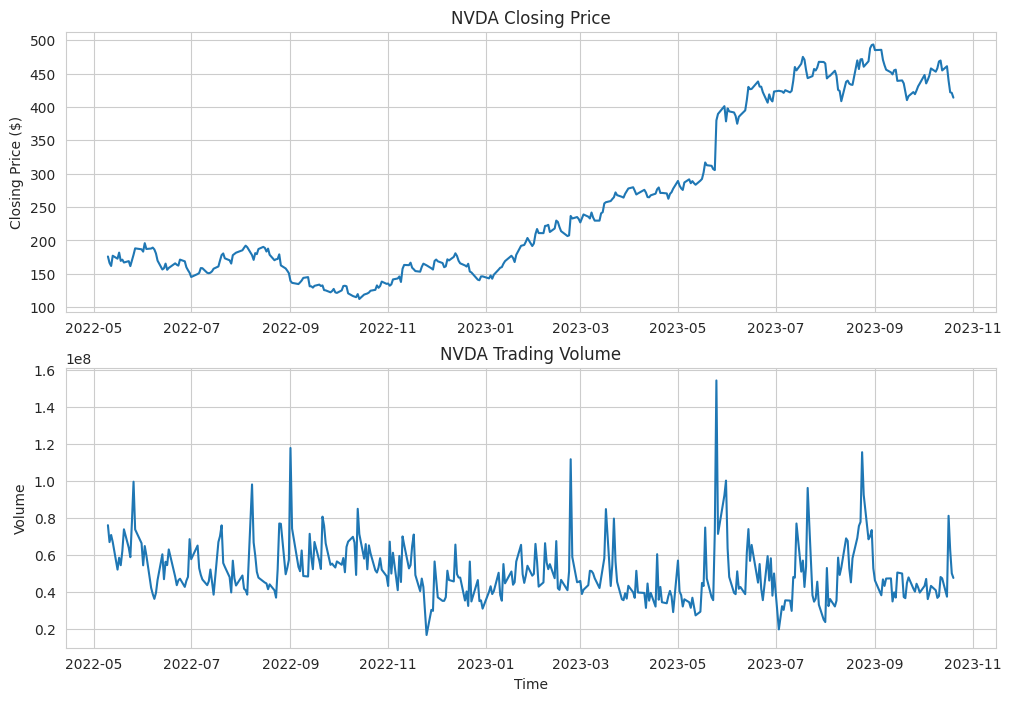

In [7]:
# Same plot but only for the last 365 days

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(data['Close'][-365:])
plt.title('NVDA Closing Price')
plt.ylabel('Closing Price ($)')

plt.subplot(2, 1, 2)
plt.plot(data['Volume'][-365:])
plt.title('NVDA Trading Volume')
plt.ylabel('Volume')

plt.xlabel('Time')
plt.show()

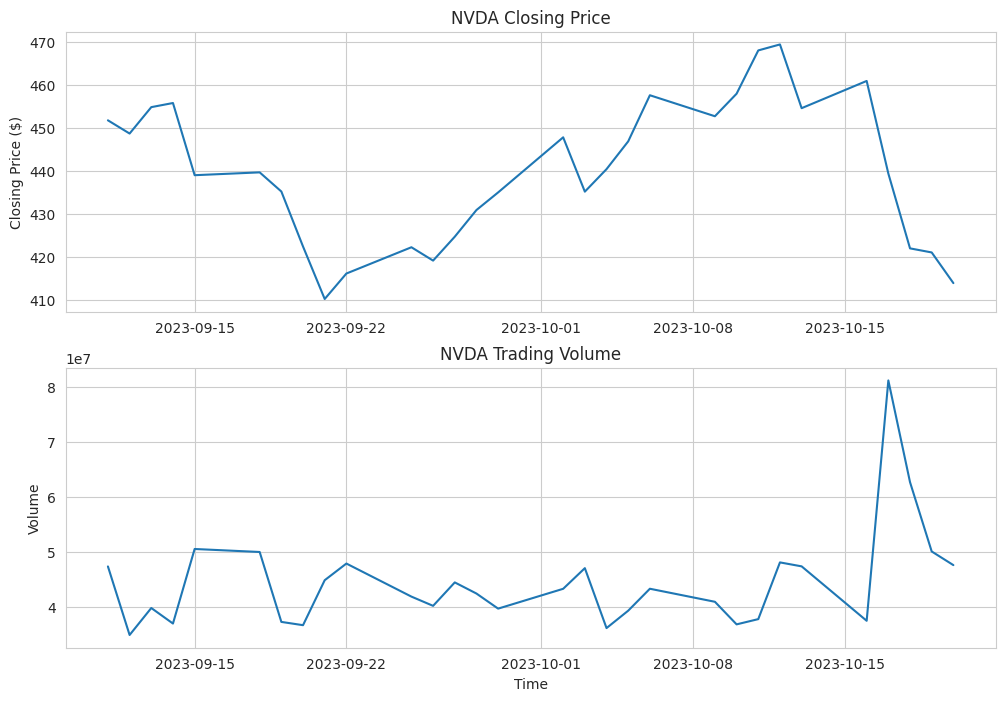

In [8]:
# Same plot but only for the last 30 days

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(data['Close'][-30:])
plt.title('NVDA Closing Price')
plt.ylabel('Closing Price ($)')

plt.subplot(2, 1, 2)
plt.plot(data['Volume'][-30:])
plt.title('NVDA Trading Volume')
plt.ylabel('Volume')

plt.xlabel('Time')
plt.show()

# Data Enhancement

### Get more relevant data

Since we are trying to predict future stock price of Nvidia, we can also include the stock price of other companies that have close relationship with Nvidia (especially in the GPU industry) as their stock price may be influenced by similar market forces, such as demand for GPUs, technological breakthroughs, and competition dynamics. For example:

- AMD, INTC, TSM: Nvidia's main partners and competitors
- AAPL, MSFT, GOOG: Nvidia's main customers

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
(10993, 6)
(10993, 6)
(6551, 6)
(10805, 6)
(9479, 6)
(4827, 6)


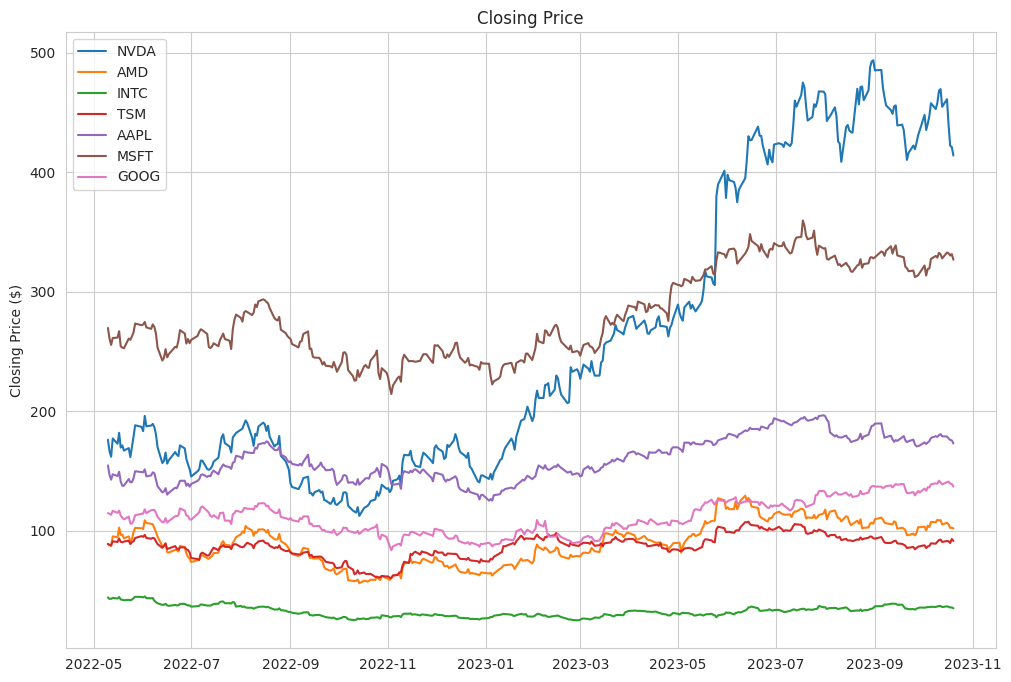

In [9]:
amd_data = yf.download("AMD")
intel_data = yf.download("INTC")
tsmc_data = yf.download("TSM")
apple_data = yf.download("AAPL")
microsof_data = yf.download("MSFT")
google_data = yf.download("GOOG")

print(amd_data.shape)
print(intel_data.shape)
print(tsmc_data.shape)
print(apple_data.shape)
print(microsof_data.shape)
print(google_data.shape)

# Plot all the closing prices on the same chart for the last 365 days
plt.figure(figsize=(12, 8))
plt.plot(data['Close'][-365:], label='NVDA')
plt.plot(amd_data['Close'][-365:], label='AMD')
plt.plot(intel_data['Close'][-365:], label='INTC')
plt.plot(tsmc_data['Close'][-365:], label='TSM')
plt.plot(apple_data['Close'][-365:], label='AAPL')
plt.plot(microsof_data['Close'][-365:], label='MSFT')
plt.plot(google_data['Close'][-365:], label='GOOG')
plt.title('Closing Price')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.show()

Given the sudden surge of NVDA price in 2023-05, which can be attributed to a rising demand for GPUs for training large generative AI and language models. It is quite surprising AMD and Intel's stock price did not follow the same trend as they are supposed to be the main competitors of Nvidia in the GPU industry.

Reference news: https://www.cnbc.com/2023/05/25/nvidia-on-track-for-record-high-driven-by-ai-chip-demand.html

In [10]:
# Concatenate all these companies' closing prices into a the main data df, only keep the rows in the index

amd_data = amd_data.rename(columns={'Close': 'AMD'})
intel_data = intel_data.rename(columns={'Close': 'INTC'})
tsmc_data = tsmc_data.rename(columns={'Close': 'TSM'})
apple_data = apple_data.rename(columns={'Close': 'AAPL'})
microsof_data = microsof_data.rename(columns={'Close': 'MSFT'})
google_data = google_data.rename(columns={'Close': 'GOOG'})

data = data.merge(amd_data['AMD'], left_index=True, right_index=True, how='left')
data = data.merge(intel_data['INTC'], left_index=True, right_index=True, how='left')
data = data.merge(tsmc_data['TSM'], left_index=True, right_index=True, how='left')
data = data.merge(apple_data['AAPL'], left_index=True, right_index=True, how='left')
data = data.merge(microsof_data['MSFT'], left_index=True, right_index=True, how='left')
data = data.merge(google_data['GOOG'], left_index=True, right_index=True, how='left')
data

,Open,High,Low,Close,Adj Close,Volume,AMD,INTC,TSM,AAPL,MSFT,GOOG
Date,,,,,,,,,,,,
1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376288,271468800,10.781250,32.218750,6.144884,0.345982,39.062500,NaN
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415709,51048000,10.718750,32.656250,5.913729,0.351563,40.468750,NaN
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383456,34320000,11.000000,34.234375,6.376040,0.361607,42.890625,NaN
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382261,24436800,10.625000,33.187500,6.221936,0.358259,42.156250,NaN
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381067,22752000,11.437500,34.296875,6.241199,0.364955,43.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-16,450.630005,462.250000,449.119995,460.950012,460.950012,37509900,106.459999,36.560001,91.220001,178.720001,332.640015,140.490005
2023-10-17,440.000000,447.540009,424.799988,439.380005,439.380005,81233300,105.139999,36.060001,91.000000,177.149994,332.059998,140.990005
2023-10-18,425.910004,432.190002,418.250000,421.959991,421.959991,62729400,102.169998,35.639999,89.599998,175.839996,330.109985,139.279999


# Training

### Process the data

We limits our dataset to only after 2016 since there were no significant changes in the closing price of NVDA before 2016.

In [11]:
# Filter data before 2016
data = data[data.index > '2016-01-01']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1964 entries, 2016-01-04 to 2023-10-20
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1964 non-null   float64
 1   High       1964 non-null   float64
 2   Low        1964 non-null   float64
 3   Close      1964 non-null   float64
 4   Adj Close  1964 non-null   float64
 5   Volume     1964 non-null   int64  
 6   AMD        1964 non-null   float64
 7   INTC       1964 non-null   float64
 8   TSM        1964 non-null   float64
 9   AAPL       1964 non-null   float64
 10  MSFT       1964 non-null   float64
 11  GOOG       1964 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 199.5 KB


It is good that there are no missing values in the dataset so we don't have to worry about that.

### Fit the ROCKET model

https://github.com/angus924/rocket

This method uses random convolutional kernels for feature transforming and then fit a linear model using those features. Since the weights of the convolutional kernels are not learnt like in convolutional neural networks, it is much faster to train. It is also shown to have good performance on time series data compared to other methods.

### ROCKET model

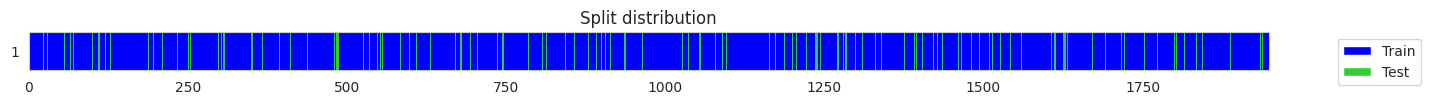

[Pipeline] ............ (step 1 of 3) Processing rocket, total=  16.9s
[Pipeline] ............ (step 2 of 3) Processing scalar, total=   0.8s
[Pipeline] ........... (step 3 of 3) Processing ridgecv, total=   2.1s
window_length = 7, RMSE = 4.363018749722438, validation size = 194


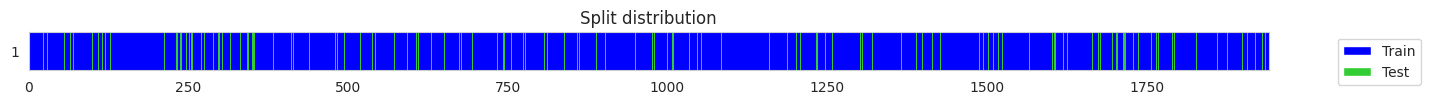

[Pipeline] ............ (step 1 of 3) Processing rocket, total=  12.6s
[Pipeline] ............ (step 2 of 3) Processing scalar, total=   0.8s
[Pipeline] ........... (step 3 of 3) Processing ridgecv, total=   2.0s
window_length = 14, RMSE = 4.4531370040798155, validation size = 194


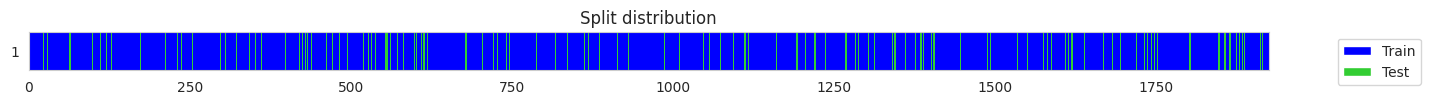

[Pipeline] ............ (step 1 of 3) Processing rocket, total=  28.9s
[Pipeline] ............ (step 2 of 3) Processing scalar, total=   0.8s
[Pipeline] ........... (step 3 of 3) Processing ridgecv, total=   2.0s
window_length = 30, RMSE = 4.163691696711828, validation size = 192


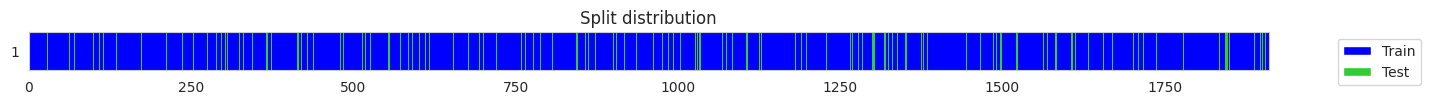

[Pipeline] ............ (step 1 of 3) Processing rocket, total=  43.6s
[Pipeline] ............ (step 2 of 3) Processing scalar, total=   0.8s
[Pipeline] ........... (step 3 of 3) Processing ridgecv, total=   2.0s
window_length = 45, RMSE = 3.697251824315009, validation size = 191


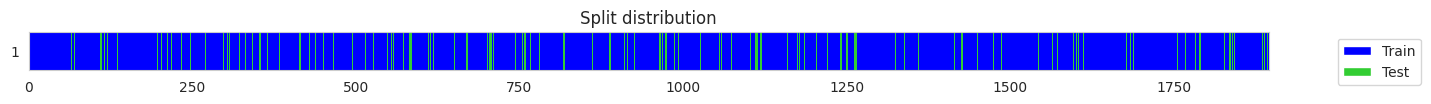

[Pipeline] ............ (step 1 of 3) Processing rocket, total=  57.9s
[Pipeline] ............ (step 2 of 3) Processing scalar, total=   0.8s
[Pipeline] ........... (step 3 of 3) Processing ridgecv, total=   2.0s
window_length = 60, RMSE = 3.986327458308696, validation size = 189


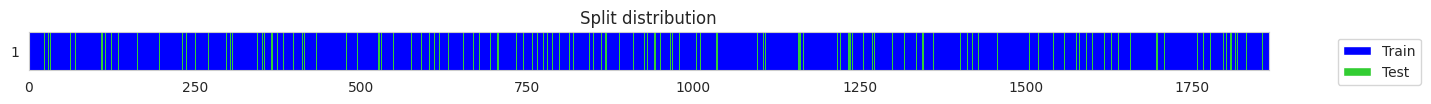

[Pipeline] ............ (step 1 of 3) Processing rocket, total= 1.4min
[Pipeline] ............ (step 2 of 3) Processing scalar, total=   0.8s
[Pipeline] ........... (step 3 of 3) Processing ridgecv, total=   1.9s
window_length = 90, RMSE = 4.145259610745287, validation size = 186


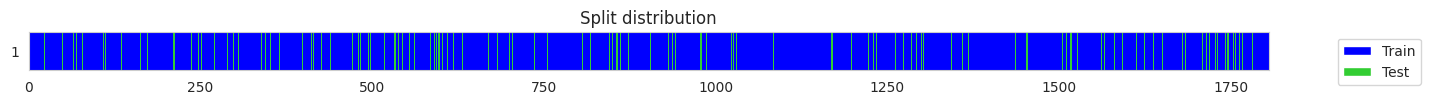

[Pipeline] ............ (step 1 of 3) Processing rocket, total= 2.3min
[Pipeline] ............ (step 2 of 3) Processing scalar, total=   0.8s
[Pipeline] ........... (step 3 of 3) Processing ridgecv, total=   1.8s
window_length = 150, RMSE = 4.492454316659037, validation size = 180


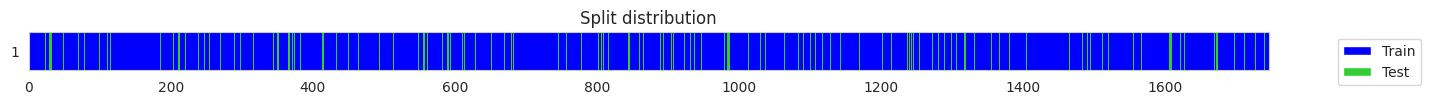

[Pipeline] ............ (step 1 of 3) Processing rocket, total= 3.1min
[Pipeline] ............ (step 2 of 3) Processing scalar, total=   0.8s
[Pipeline] ........... (step 3 of 3) Processing ridgecv, total=   2.0s
window_length = 210, RMSE = 4.35768605866645, validation size = 174


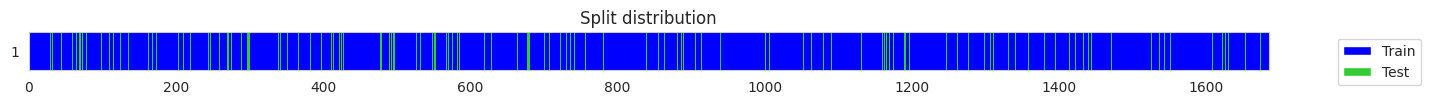

[Pipeline] ............ (step 1 of 3) Processing rocket, total= 3.9min
[Pipeline] ............ (step 2 of 3) Processing scalar, total=   0.7s
[Pipeline] ........... (step 3 of 3) Processing ridgecv, total=   1.6s
window_length = 270, RMSE = 4.031816080227385, validation size = 168


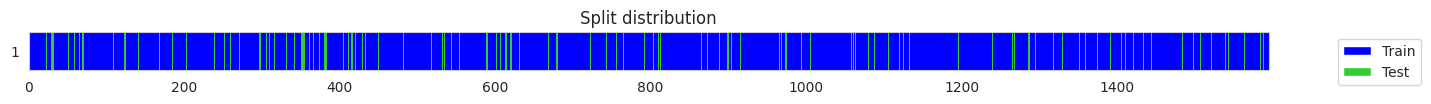

[Pipeline] ............ (step 1 of 3) Processing rocket, total= 4.9min
[Pipeline] ............ (step 2 of 3) Processing scalar, total=   0.7s
[Pipeline] ........... (step 3 of 3) Processing ridgecv, total=   1.4s
window_length = 360, RMSE = 4.193612437400671, validation size = 159


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from tsai.all import *

for window_length in [7, 14, 30, 45, 60, 90, 150, 210, 270, 360]:
    horizon = 10 # predict the next 10 days

    # Set up a multivariate time series regression problem, all the columns except the date are used as features to predict the closing price
    X, y = SlidingWindow(window_length, horizon=horizon, get_y='Close')(data)
    splits = get_splits(y, valid_size=0.1, random_state=42, shuffle=True) # use 10% of the data for validation

    X_train, y_train, X_valid, y_valid = X[splits[0]], y[splits[0]], X[splits[1]], y[splits[1]]

    rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    reg = RocketRegressor(normalize_input=False, normalize_features=True, random_state=42, verbose=True) # normalize the features but not the samples
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_valid)
    print(f'window_length = {window_length}, RMSE = {mean_squared_error(y_valid, y_pred, squared=False)}, validation size = {len(y_valid)}')

Seems like 45 is a reasonable window length for training (which is about 2-3 months).

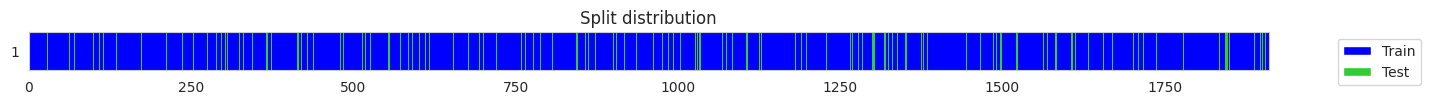

In [13]:
window_length = 45 # use 45 days of historical data to make the prediction
horizon = 10 # predict the next 10 days

# Set up a multivariate time series regression problem, all the columns except the date are used as features to predict the closing price
X, y = SlidingWindow(window_length, horizon=horizon, get_y='Close')(data)
splits = get_splits(y, valid_size=0.1, random_state=42, shuffle=True) # use 10% of the data for validation

X_train, y_train, X_valid, y_valid = X[splits[0]], y[splits[0]], X[splits[1]], y[splits[1]]

rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
reg = RocketRegressor(normalize_input=False, normalize_features=True, random_state=42, verbose=True) # normalize the features but not the samples

In [14]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_valid)
print(f'window_length = {window_length}, RMSE = {mean_squared_error(y_valid, y_pred, squared=False)}, validation size = {len(y_valid)}')

[Pipeline] ............ (step 1 of 3) Processing rocket, total=  43.2s
[Pipeline] ............ (step 2 of 3) Processing scalar, total=   0.8s
[Pipeline] ........... (step 3 of 3) Processing ridgecv, total=   1.9s
window_length = 45, RMSE = 3.697251824315009, validation size = 191


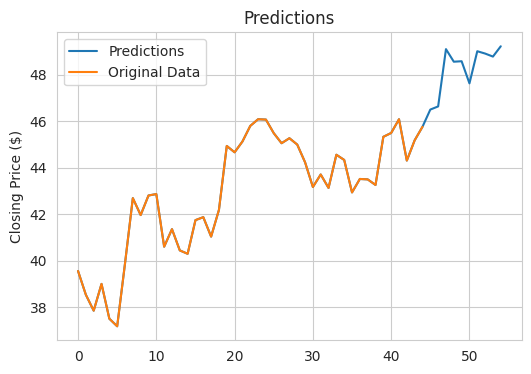

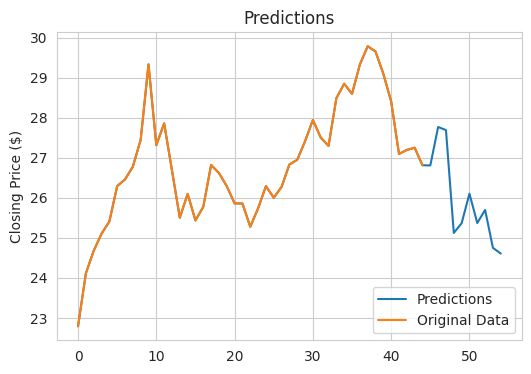

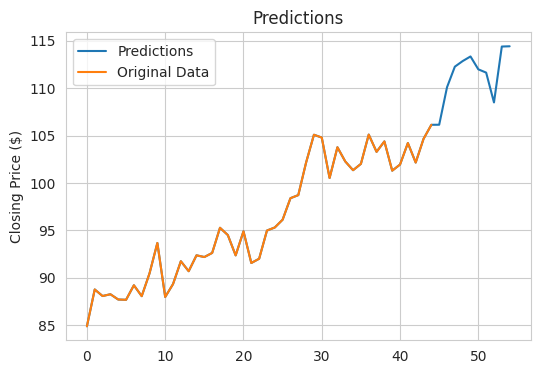

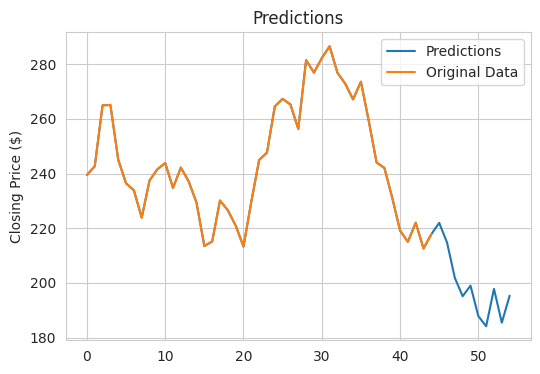

In [15]:
# Plot some predictions to see
for i in range(4):
    idx = random.randint(0, len(X_valid))
    X_test = X_valid[idx].reshape(1, -1, window_length)
    y_test = y_valid[idx]
    y_pred = reg.predict(X_test)

    original_data = X_test[0][3] # Column 3 is the closing price
    plot_data = np.append(original_data, y_test)

    # Plot the predictions for both models
    plt.figure(figsize=(6, 4))
    plt.plot(plot_data, label='Predictions')
    plt.plot(original_data, label='Original Data')
    plt.title('Predictions')
    plt.ylabel('Closing Price ($)')
    plt.legend()
    plt.show()

### Fit the LSTM model

Instead of using a CNN-based method, we can also use a RNN-based method to train the model. LSTM is a popular choice for time series data as it can capture long-term dependencies in the data and is less prone to the vanishing gradient problem. We can also incorporate the attention mechanism to teach the model to focus on the most relevant features.

X      - shape: [1910 samples x 12 features x 45 timesteps]  type: ndarray  dtype:float64  isnan: 0
y      - shape: (1910, 10)  type: ndarray  dtype:float64  isnan: 0
splits - n_splits: 2 shape: [1719, 191]  overlap: False


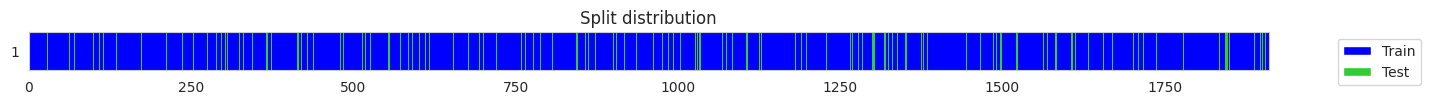

In [16]:
tfms  = [None, [TSRegression()]]
batch_tfms = TSStandardize(by_sample=False, by_var=True) # normalize each variable separately, but same normalization for all samples for each feature

check_data(X, y, splits)

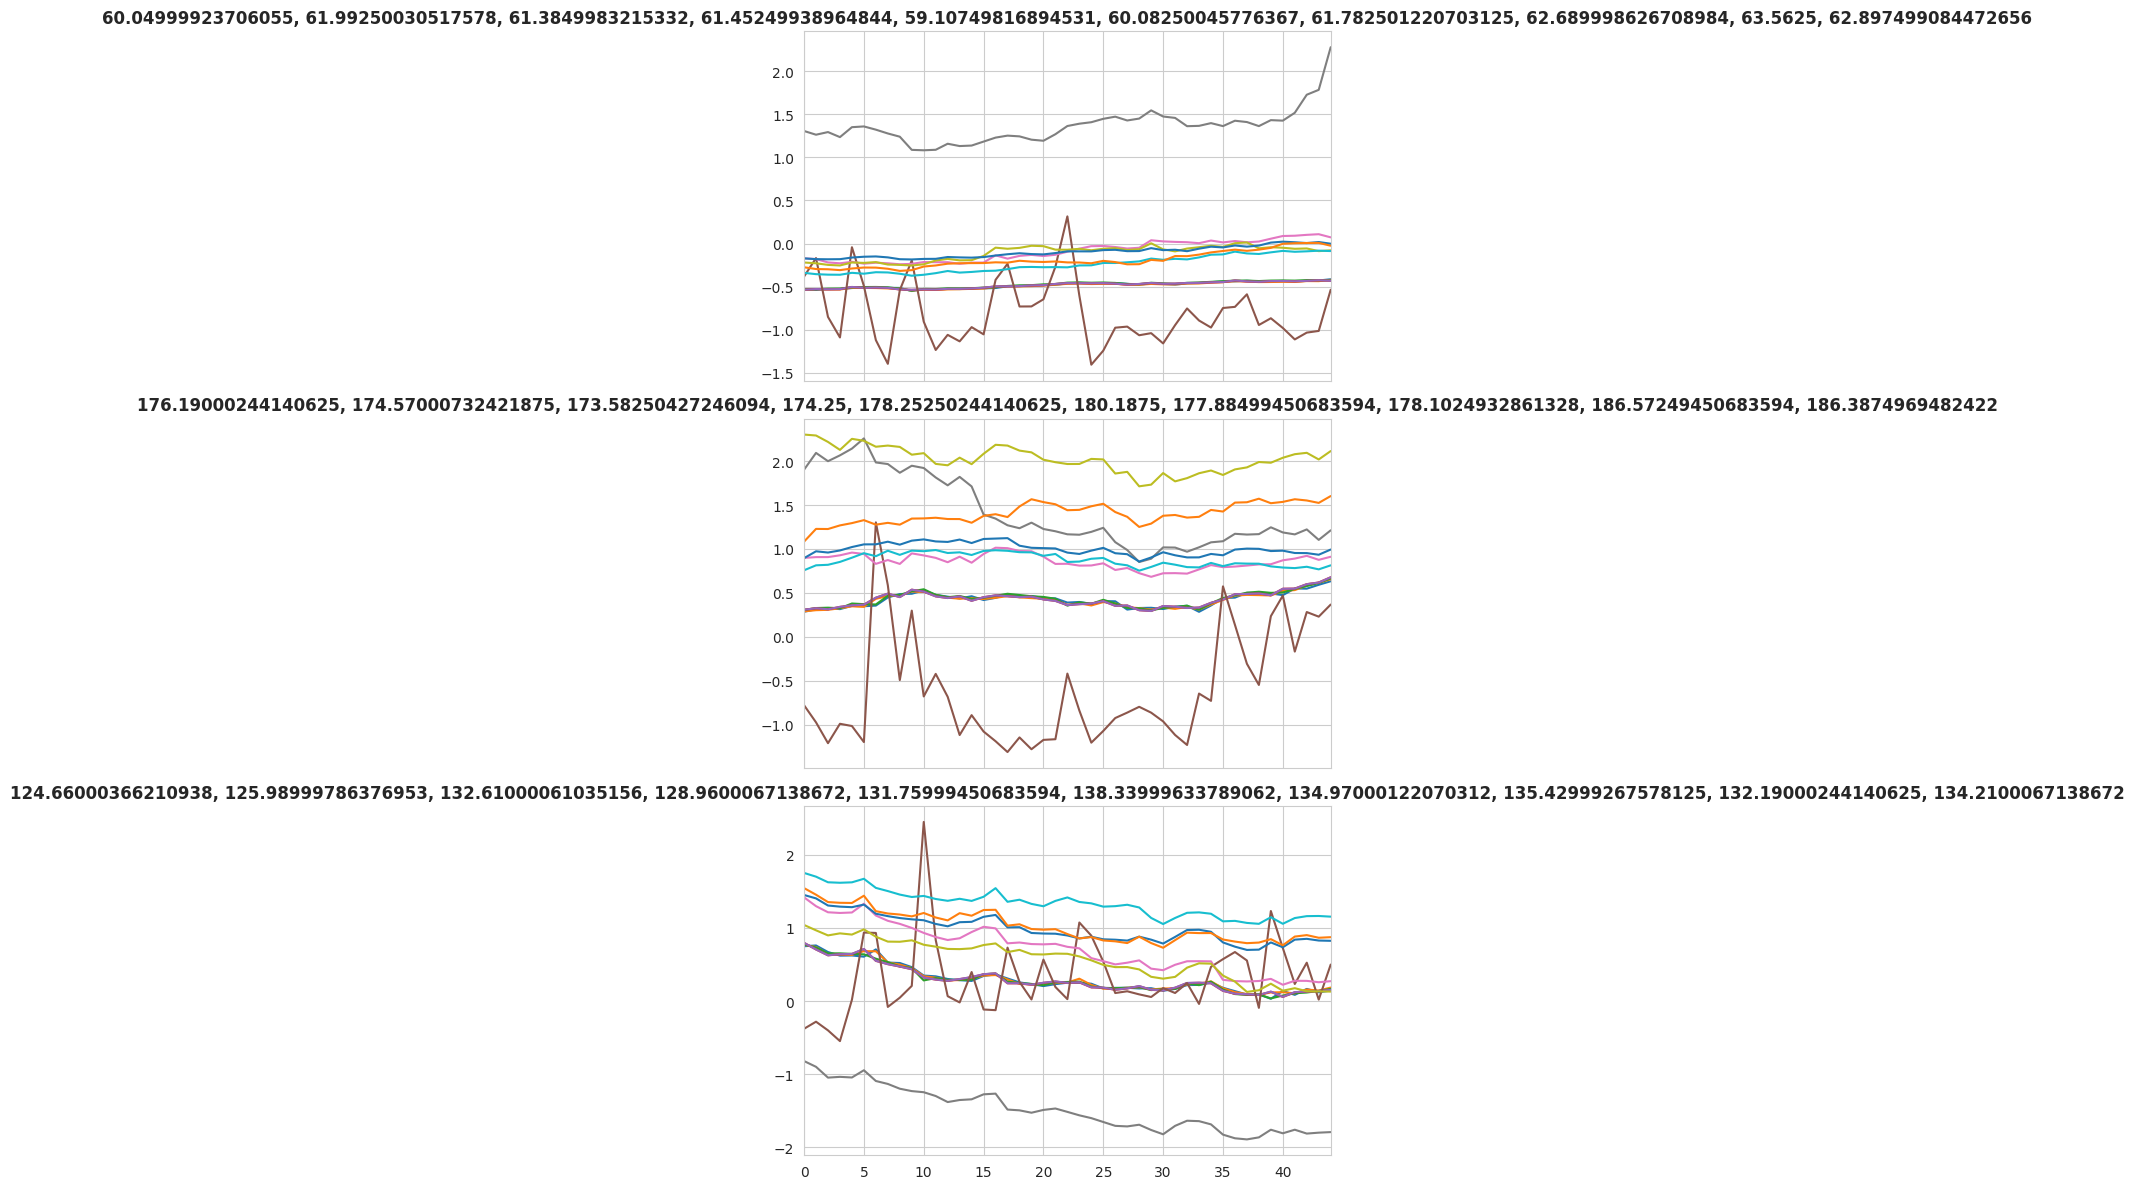

In [17]:
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=128)
dls.show_batch(max_n=3)

In [18]:
dls.c = horizon
model = LSTMAttention(dls.vars, dls.c, dls.len)
model

LSTMAttention(
  (rnn): LSTM(12, 128, batch_first=True)
  (encoder): _TSTEncoder(
    (layers): ModuleList(
      (0-2): 3 x _TSTEncoderLayer(
        (self_attn): _MultiHeadAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=False)
          (W_K): Linear(in_features=128, out_features=128, bias=False)
          (W_V): Linear(in_features=128, out_features=128, bias=False)
          (W_O): Linear(in_features=128, out_features=128, bias=False)
        )
        (dropout_attn): Dropout(p=0.1, inplace=False)
        (batchnorm_attn): Sequential(
          (0): Transpose(1, 2)
          (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): Transpose(1, 2)
        )
        (ff): Sequential(
          (0): Linear(in_features=128, out_features=256, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.1, inplace=False)
          (3): Linear(in_features=256, out_features=128, bias=True)
        )
    

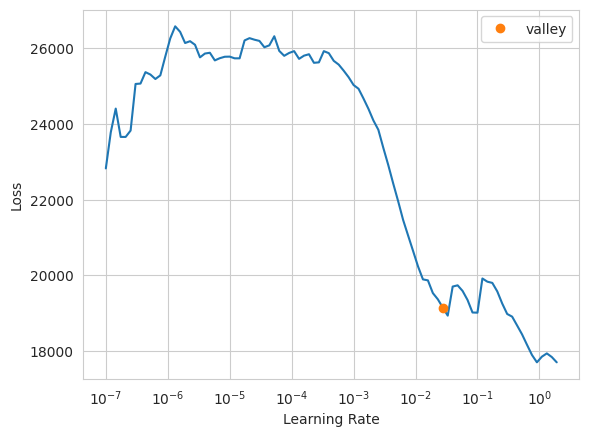

In [19]:
learn = ts_learner(dls, model, metrics=[rmse], cbs=ShowGraph())
suggested_lr = learn.lr_find()

epoch,train_loss,valid_loss,_rmse,time
0,19966.607422,17239.525391,131.299377,00:00
1,13450.133789,8429.930664,91.814651,00:00
2,9172.207031,3628.609375,60.237934,00:00
3,6501.946289,4682.223145,68.426773,00:00
4,4838.727051,2462.920410,49.627815,00:00
5,3791.104492,4100.956543,64.038704,00:00
6,3113.645752,34475.527344,185.675873,00:00
7,2530.955322,12175.741211,110.343742,00:00
8,2117.861816,23933.267578,154.703812,00:00
9,1816.339722,514.199829,22.675974,00:00


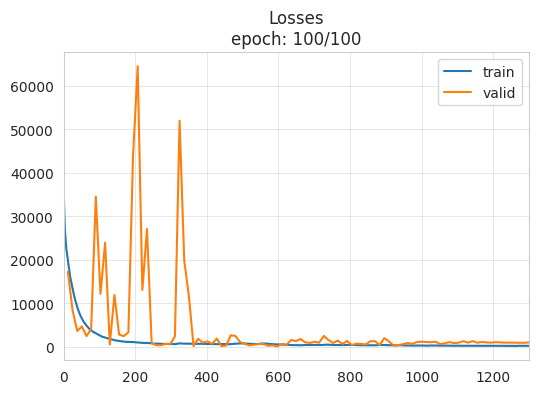

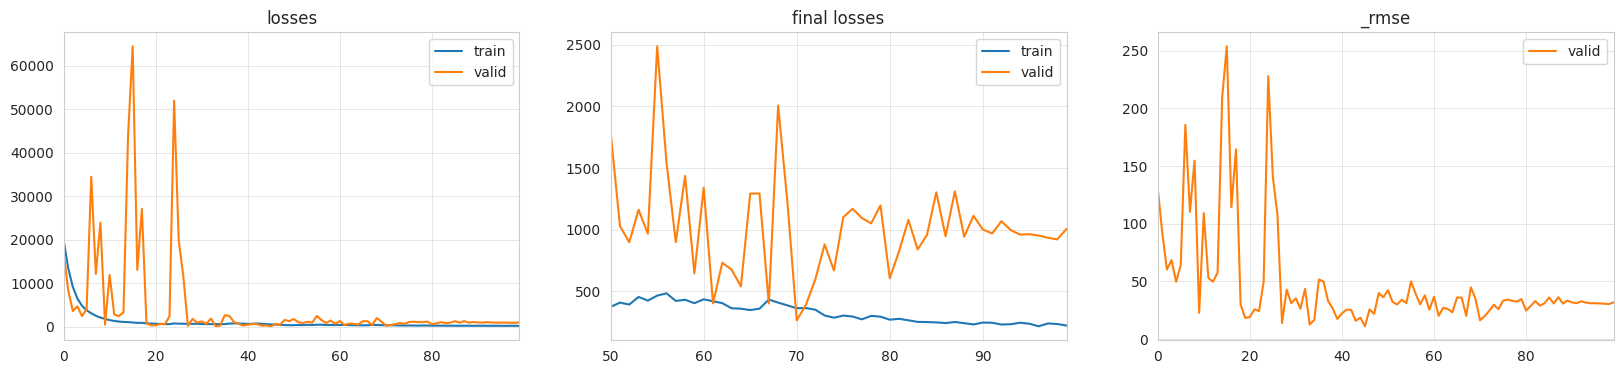

In [20]:
learn.fit_one_cycle(100, suggested_lr)

# Inference

In [21]:
# Use the last 45 days of data to predict the next 10 days
X_test = np.array(data[-window_length:]).transpose().reshape(1, -1, window_length)

In [22]:
# Get the predictions for the test set
y_test_rocket = reg.predict(X_test)
y_test_lstm, _, _ = learn.get_X_preds(X_test, with_decoded=True)

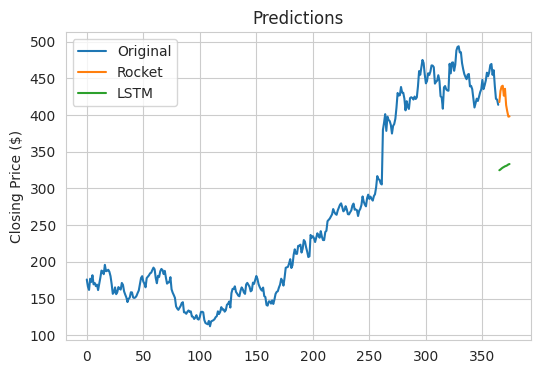

In [23]:
# Append the predictions to the original data frame
original_data = data[-365:]['Close'].values

# Plot the predictions for both models
plt.figure(figsize=(6, 4))
plt.plot(original_data, label='Original')
plt.plot(np.arange(365, 365 + horizon), y_test_rocket[0], label='Rocket')
plt.plot(np.arange(365, 365 + horizon), y_test_lstm[0], label='LSTM')
plt.title('Predictions')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.show()

Upon inspection, the ROCKET predictions seem much more reasonable that the LSTM predictions

In [24]:
df_submission = pd.DataFrame(y_test_rocket[0], columns=['Close'])
df_submission.index.name = 'index'
df_submission

,Close
index,
0,417.657232
1,432.657346
2,438.794729
3,439.812029
4,426.262979
5,435.653376
6,413.441716
7,404.893586
8,397.702747


In [25]:
df_submission.to_csv("submission.csv")